In [1]:
import speech_recognition as sr

In [2]:
def recognize_speech_from_mic(recognizer,microphone):
    if not isinstance(recognizer,sr.Recognizer):
        raise TypeError("'recognizer'must be 'Microphone' instance")
    if not isinstance(microphone, sr.Microphone):
        raise TypeError("'microphone' must be 'Microphone' instance")

    with microphone as source:
        recognizer.adjust_for_ambient_noise(source)
        audio = recognizer.listen(source)

    response = {
        'success' : True,
        'error' : None,
        'transcription' : None
    }

    try:
        response['transcription'] = recognizer.recognize_google(audio)
    except sr.RequestError:
        response['sucess'] = False
        response['error'] = 'API unavailable/unresponsive'

    except sr.UnknownValueError:
        response['error'] = 'unable to recognize speech'

    return response


In [3]:
recognizer = sr.Recognizer()

In [4]:
mic = sr.Microphone(device_index=1)

In [7]:
response = recognize_speech_from_mic(recognizer,mic)

In [8]:
print('\nSuccess : {}\nError : {}\n\nText from speech\n{}\n\n{}' \
      .format(response['success'],
               response['error'],
               '-'*17,
               response['transcription']))


Success : True
Error : None

Text from speech
-----------------

Iron Man


In [9]:
temp_str = ''
records_all = []
while (temp_str != 'bye'):
    print ('speak it out')
    response = recognize_speech_from_mic(recognizer,mic)
    if response['success']:
        temp_str = response['transcription']
        print('you said :', temp_str)
        if (temp_str != 'bye'):
            records_all.append(temp_str)
print('thanks for your suggestion')

speak it out
you said : save
speak it out
you said : happy
speak it out
you said : enemy
speak it out
you said : None
speak it out
you said : world
speak it out
you said : Hero
speak it out
you said : destroy
speak it out
you said : None
speak it out
you said : bye
thanks for your suggestion


In [14]:
print('your suggestion on give movies')
print(records_all)
records_all.remove(None)

your suggestion on give movies
['save', 'happy', 'enemy', 'world', 'Hero', 'destroy']


In [16]:
records_all

['save', 'happy', 'enemy', 'world', 'Hero', 'destroy']

In [17]:
!pip install textblob

In [18]:
from textblob import TextBlob

In [19]:
def get_sentiment(sentx):
    
    analysis = TextBlob(sentx)
    if analysis.sentiment.polarity > 0:
        return ('positive')
    elif analysis.sentiment.polarity == 0:
        return('neutral')
    else:
        return('negative')
sentimets_total = {'neutral' : 0, 'positive' : 0,'negative' : 0}


In [20]:
for recd_sent in records_all:
    sentiment = get_sentiment(recd_sent)
    print(sentiment, '=========>', recd_sent)
    sentimets_total[sentiment] = sentimets_total[sentiment]+1
    print('#######################################')

neutral =========> save
#######################################
positive =========> happy
#######################################
neutral =========> enemy
#######################################
neutral =========> world
#######################################
neutral =========> Hero
#######################################
negative =========> destroy
#######################################


In [21]:
print(sentimets_total)

{'neutral': 4, 'positive': 1, 'negative': 1}


In [22]:
from matplotlib import pyplot as plt
slices = [sentimets_total['neutral'],sentimets_total['positive'],sentimets_total['negative']]
activities = ['neutral', 'positive','negative']
cols = ['c','m','r']

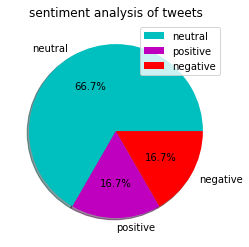

In [23]:
plt.pie(slices,labels=activities,colors = cols,shadow = True,autopct = '%1.1f%%')
plt.title('sentiment analysis of tweets')
plt.legend()
plt.show()